<a href="https://colab.research.google.com/github/jorgemendoza08/DL_NeuralFromScratch/blob/master/DL_5_Neural_net_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lección 5: BackPropagation

In [0]:
%matplotlib inline
from fastai.basics import *

# MNIST SGD
El conjunto de datos MNIST consta de imágenes escritas a mano.
Para obtener los datos (más de 60.000 ejemplos) debemos descargar el siguiente archivo: http://deeplearning.net/data/mnist/mnist.pkl.gz

In [2]:
#Creamos la ruta donde vamos a cargar nuestro archivo comprimido
#carpeta raiz será content
path = Path('data/mnist')
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('data/mnist')

In [4]:
path.ls()

[PosixPath('data/mnist/mnist.pkl.gz')]

In [0]:
#rb - lectura archivo binario
#pickle --descargas
#Tomamos datos de entrenamiento, validacion, pero no de pruebas que es el
#tercer parametro de la funcion
with gzip.open(path/'mnist.pkl.gz', 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

**[plt.imshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html):**Muestra una imagen, es decir, datos en un ráster regular 2D.

**Parametros:**matplotlib.pyplot.imshow(X, cmap=None)


(50000, 784)

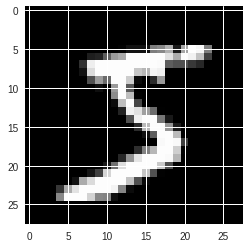

In [10]:
plt.imshow(x_train[0].reshape((28,28)), cmap="gray")
x_train.shape
#50000 fila, 784 columna

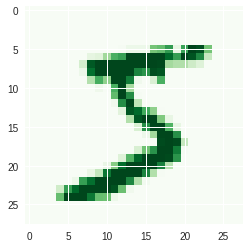

In [0]:
#plt.imshow(x_train[0].reshape((28,28)), cmap="Greens")

Vamos a transformar nuestras **matrices numpy **a **tensores**.


In [11]:

x_train,y_train,x_valid,y_valid = map(torch.tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train.shape, y_train.min(), y_train.max()

(torch.Size([50000, 784]), tensor(0), tensor(9))

*Dividimos nuestro conjunto de datos en mini lotes para un mejor rendimiento en cuanto a tiempo*
Obtendremos nuestros datos de entrenamiento y validacion usando la función [TensorDatase](https://pytorch.org/cppdocs/api/structtorch_1_1data_1_1datasets_1_1_tensor_dataset.html)t de pytorch.

In [0]:
bs=64
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
#Data a entrenar
data = DataBunch.create(train_ds, valid_ds, bs=bs)

* Lo que significa que cada vez que solicite el siguiente valor, un iterador sabe cómo calcularlo. Mantiene información sobre el estado actual del [iterable](https://www.datacamp.com/community/tutorials/python-iterator-tutorial) que está trabajando. El iterador llama al siguiente valor cuando llama a **[next](https://www.programiz.com/python-programming/methods/built-in/next)()**en él. Un objeto que utiliza el método __next __ () es, en última instancia, un iterador.*

In [14]:
x,y = next(iter(data.train_dl))
x.shape,y.shape

(torch.Size([64, 784]), torch.Size([64]))

In [0]:
#a_set = {1, 2, 3}
#b_iterator = iter(a_set)
#print (b_iterator)
#print (next(b_iterator))
#print (next(b_iterator))

In [0]:

class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10, bias=True)

    def forward(self, xb): return self.lin(xb)

[nn.Module](https://pytorch.org/docs/stable/nn.html#) - [nn.Linear](https://pytorch.org/docs/stable/nn.html#linear)

In [0]:
model = Mnist_Logistic().cuda()


In [18]:
model


Mnist_Logistic(
  (lin): Linear(in_features=784, out_features=10, bias=True)
)

In [19]:
model.lin


Linear(in_features=784, out_features=10, bias=True)

In [20]:
model(x).shape


torch.Size([64, 10])

In [21]:
[p.shape for p in model.parameters()]


[torch.Size([10, 784]), torch.Size([10])]

In [0]:
lr=2e-2


In [0]:
loss_func = nn.CrossEntropyLoss()


In [0]:
def update(x,y,lr):
    wd = 1e-5
    y_hat = model(x)
    # weight decay
    w2 = 0.
    for p in model.parameters(): w2 += (p**2).sum()
    # add to regular loss
    loss = loss_func(y_hat, y) + w2*wd
    loss.backward()
    with torch.no_grad():
        for p in model.parameters():
            p.sub_(lr * p.grad)
            p.grad.zero_()
    return loss.item()

In [0]:
losses = [update(x,y,lr) for x,y in data.train_dl]


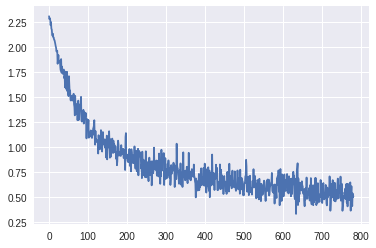

In [27]:
plt.plot(losses);


# MNIST neural network
Construyendo una red neuronal desde cero

In [0]:
class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784, 50, bias=True)
        self.lin2 = nn.Linear(50, 10, bias=True)

    def forward(self, xb):
        x = self.lin1(xb)
        x = F.relu(x)
        return self.lin2(x)

In [0]:
model = Mnist_NN().cuda()


In [0]:
losses = [update(x,y,lr) for x,y in data.train_dl]


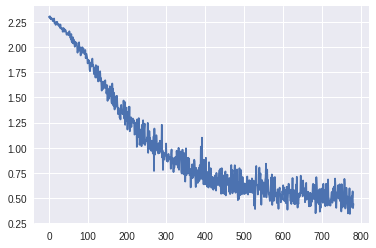

In [32]:
plt.plot(losses);


In [0]:
model = Mnist_NN().cuda()


In [0]:
def update(x,y,lr):
    opt = optim.Adam(model.parameters(), lr)
    y_hat = model(x)
    loss = loss_func(y_hat, y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    return loss.item()

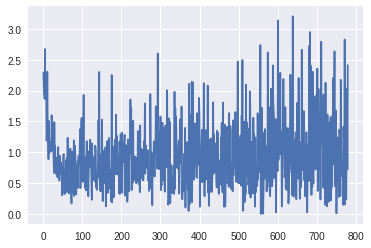

In [39]:
losses = [update(x,y,lr) for x,y in data.train_dl]
plt.plot(losses);



In [0]:
model = Mnist_NN().cuda()


In [0]:
def update(x,y,lr):
    opt = optim.Adam(model.parameters(), lr)
    y_hat = model(x)
    loss = loss_func(y_hat, y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    return loss.item()

In [0]:
losses = [update(x,y,1e-3) for x,y in data.train_dl]


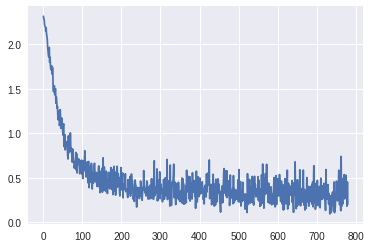

In [45]:
plt.plot(losses);


In [0]:
learn = Learner(data, Mnist_NN(), loss_func=loss_func, metrics=accuracy)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


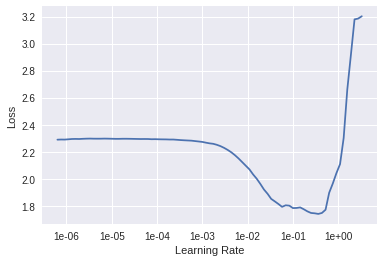

In [47]:
learn.lr_find()
learn.recorder.plot()

In [48]:
learn.fit_one_cycle(1, 1e-2)


epoch,train_loss,valid_loss,accuracy,time
0,0.153948,0.134600,0.960800,00:05


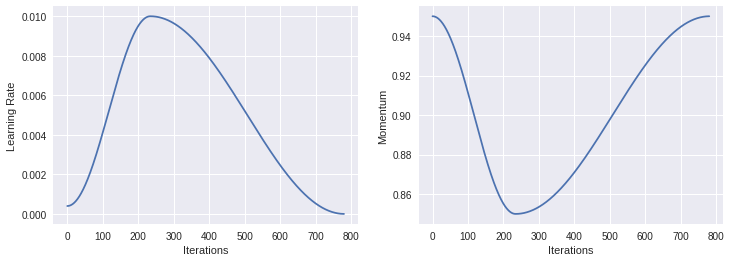

In [49]:
learn.recorder.plot_lr(show_moms=True)


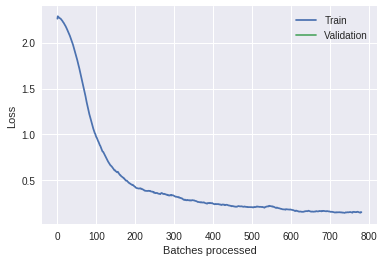

In [50]:
learn.recorder.plot_losses()
